# Evolutionary simulations with Evodoodle

Today, you will build on your experiences running evolutionary simulations with Geonomics to run simulations across your own custom landscapes. To do this, we will be using a python package called Evodoodle which will allow us to draw landscapes and then simulate evolution across them. Under the hood, Evodoodle uses Geonomics to run these simulations, so a lot of what you will see in this lab will be similar to our Geonomics labs. The key difference is that we will be able to control the configuration of the landscapes that drive population size, connectivity and local adaptation. This gives us the power to explore how the forces of evolution act across different landscapes.

## Helpful Reminders:

### Text cells
In a notebook, each rectangle containing text or code is called a cell.

Text cells (like this one) can be edited by double-clicking on them. They're written in a simple format called Markdown to add formatting and section headings. You don't need to learn Markdown, but you might want to.

After you edit a text cell, click the "run cell" button at the top to confirm any changes. (Try not to delete the instructions of the lab.)

### Code cells
Other cells contain code in the Python 3 language. Running a code cell will execute all of the code it contains.

To run the code in a code cell, first click on that cell to activate it. It'll be highlighted with a little green or blue rectangle. Next, either press the Run button or hold down the shift key and press return or enter.

### Comments
Comments are statements in English that the computer ignores. We use comments to explain what the surrounding code does. Comments appear in green after the # symbol.



# Import packages
Run the following cell to bring in the necessary Python packages for our exercise today. Recall that you need to run this cell and any cells above the one you are working on each time you relaunch the notebook.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import geonomics as gnx
import evodoodle as evo

# Set-up interactive display for GitHub codespaces

**BEFORE YOU START: Evodoodle requires an interactive display for drawing which takes a few simple steps to set-up on GitHub codespaces.** We have a virtual desktop which you can acccess by:
1. Clicking the `Ports` tab at the bottom of the screen in codespaces
2. Find the `desktop (6080)` port in the list (it should be the first one)
3. Click `Open in Browser` in the `Forwarded Address` column for `desktop (6080)` (click the button that looks like a globe next to the link or `Ctrl + click` the link). 
4. This will open a new tab with the interactive display called noVNC. To start the display click Connect. The screen will initially appear blank, but when you run the code to draw a landscape (i.e., run `evo.draw_landscape()`) the landscape will appear in the noVNC display tab. Once you have drawn your landscape, click SAVE and the code will continue in your codespace tab.

# Part 1: Introduction to Evodoodle

Evodoodle allows us to "doodle" our own landscapes using an interactive window. Whenever `evo.draw_landscape()` is run a pop-up will appear that allows you to draw on a landscape by clicking on the cells of the landscape. Once you have drawn your landscape, click the SAVE button and the code will continue.

Evodoodle allows us to control three different landscapes for our simulations:

1. **Carrying capacity** - this landscape controls the number of individuals that each landscape cell can support and we can use it to control population size. We can also use this landscape to create barriers by drawing areas that have a carrying capacity of zero.

2. **Connectivity** - this landscape controls how easily individuals can move through each cell and we can use it to control migration. 

3. **Environment** - this landscape defines the environmental gradient that our species will adapt to. The species has a single trait that is selected upon based on this environmental layer.

*By default all three of these landscapes have a uniform value of one; you can leave these landscapes as the default if you want to experiment with modifying just one or two landscapes at a time.* **You do not need to customize every landscape in your simulations and you often will not want to.**

### 1. Draw your landscape

Try it out for yourselves! Doodle some landscapes by running the code chunks below. Remember that if you are using the GitHub codespace you will need to go to the noVNC tab to draw on and save your landscape. Also note that if you can potentially drive your species extinct if carrying capacity is too low across the landscape, so if your simulation fails try running it again with a different carrying capacity configuration.

In [16]:

# Draw your landscape carrying capacity
# When you run this chunk a pop-up will appear where you can draw on your own landscape
# Note: d sets the dimensions of your square landscape in terms of the number of cells
carrying_capacity = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [17]:
# Draw your landscape connectivity
connectivity = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [18]:

# Draw your environment for local adaptation
environment = evo.draw_landscape(d = 10)


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


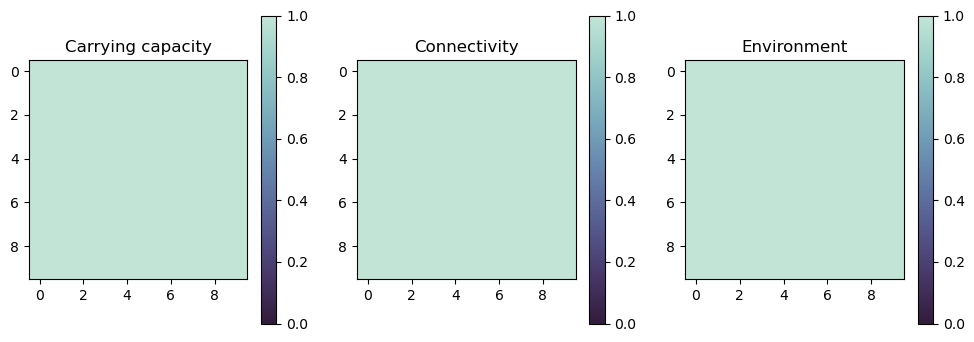

In [19]:
%matplotlib inline
# You can plot all your landscapes using plot_landscapes()
evo.plot_landscapes(carrying_capacity, connectivity, environment)

In [20]:
# If you want to change something, you can edit your landscapes using the edit_landscape() function (uncomment the line below)
# environment = evo.edit_landscape(environment)

In [21]:

# Finally, you can optionally save your landscapes
np.savetxt('carrying_capacity.csv', carrying_capacity, delimiter=',')
np.savetxt('connectivity.csv', connectivity, delimiter=',')
np.savetxt('environment.csv', environment, delimiter=',')

# Uncomment these lines to read in landscapes you have saved
#carrying_capacity = np.loadtxt('carrying_capacity.csv', delimiter=',')
#connectivity = np.loadtxt('connectivity.csv', delimiter=',')
#environment = np.loadtxt('environment.csv', delimiter=',')

### 2. Play out evolution across your landscape

Now that you have your custom landscapes, you can play out evolution across them!

In [22]:

# Evodoodle comes with an example parameters dictionary to start with:
params = evo.example_params()
# Initialize our model
mod = evo.init_mod(params, carrying_capacity, connectivity, environment)



MAKING MODEL...

	MAKING LANDSCAPE...

	MAKING COMMUNITY...

		MAKING SPECIES spp_0...

			making genomic architecture...



stty: 'standard input': Inappropriate ioctl for device


			making individuals...

			making movement surface...
				[can take a bit]



No mod.burn_fn_queue was found. Running mod.reset()...


Creating the burn-in function queue...


Creating the main function queue...


burn:	it=-1:	t=0
	species: spp_0                         N=442	(births=89	deaths=147)

	........................................................................
burn:	it=-1:	t=1
	species: spp_0                         N=410	(births=87	deaths=119)

	........................................................................
burn:	it=-1:	t=2
	species: spp_0                         N=371	(births=91	deaths=130)

	........................................................................
burn:	it=-1:	t=3
	species: spp_0                         N=346	(births=65	deaths=90)

	........................................................................
burn:	it=-1:	t=4
	species: spp_0                         N=340	(births=73	deaths=79)

	......................................................

/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=34
	species: spp_0                         N=304	(births=56	deaths=61)

	........................................................................
burn:	it=-1:	t=35
	species: spp_0                         N=307	(births=51	deaths=48)

	........................................................................
burn:	it=-1:	t=36
	species: spp_0                         N=317	(births=66	deaths=56)

	........................................................................
burn:	it=-1:	t=37
	species: spp_0                         N=324	(births=56	deaths=49)

	........................................................................
burn:	it=-1:	t=38
	species: spp_0                         N=315	(births=61	deaths=70)

	........................................................................


/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=39
	species: spp_0                         N=328	(births=68	deaths=55)

	........................................................................
burn:	it=-1:	t=40
	species: spp_0                         N=327	(births=72	deaths=73)

	........................................................................
burn:	it=-1:	t=41
	species: spp_0                         N=320	(births=68	deaths=75)

	........................................................................
burn:	it=-1:	t=42
	species: spp_0                         N=301	(births=59	deaths=78)

	........................................................................
burn:	it=-1:	t=43
	species: spp_0                         N=294	(births=66	deaths=73)

	........................................................................


/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=44
	species: spp_0                         N=294	(births=51	deaths=51)

	........................................................................
burn:	it=-1:	t=45
	species: spp_0                         N=310	(births=59	deaths=43)

	........................................................................
burn:	it=-1:	t=46
	species: spp_0                         N=325	(births=56	deaths=41)

	........................................................................
burn:	it=-1:	t=47
	species: spp_0                         N=320	(births=63	deaths=68)

	........................................................................
burn:	it=-1:	t=48
	species: spp_0                         N=299	(births=70	deaths=91)

	........................................................................
burn:	it=-1:	t=49
	species: spp_0                         N=294	(births=54	deaths=59)

	........................................................................
burn:	it=-1:	t=50
	species: spp_0 

Evodoodle has a special function for plotting our simulations called `plot_popgen()`.  This function produces four plots.

1. **PCA plot in PCA space** - this plot shows each individual plotted in genetic PC space. The closer individuals are together, the more similar they are. They also are colored based on the PCs to help in interpretation of PCA map; more similar the colors = more genetically similar individuals.

2. **PCA plot in landscape space** - this plot shows each individual plotted across the landscape, colored based on the genetic PCs; more similar the colors = more genetically similar individuals. By default, the "background" of this plot is the carrying capacity landscape, however this background is just for visualization purposes and could theoretically be set to any of the three layers (i.e., carrying capacity, connectivity, or environment).

3. **Heterozygosity plot** - this plot shows each individual plotted across the landscape, colored based on their heterozygosity. This allows us to see how genetic diversity varies across space. The background of this plot is the connectivity landscape, however this background is just for visualization purposes and could theoretically be set to any of the three layers (i.e., carrying capacity, connectivity, or environment).

4. **Phenotype-environment plot** - this plot shows each individual plotted across the landscape, colored based on their phenotype. The background is the environmental layer driving selection on this phenotype. Matching between the individual's color and the background color indicates that local adaptation is occurring.

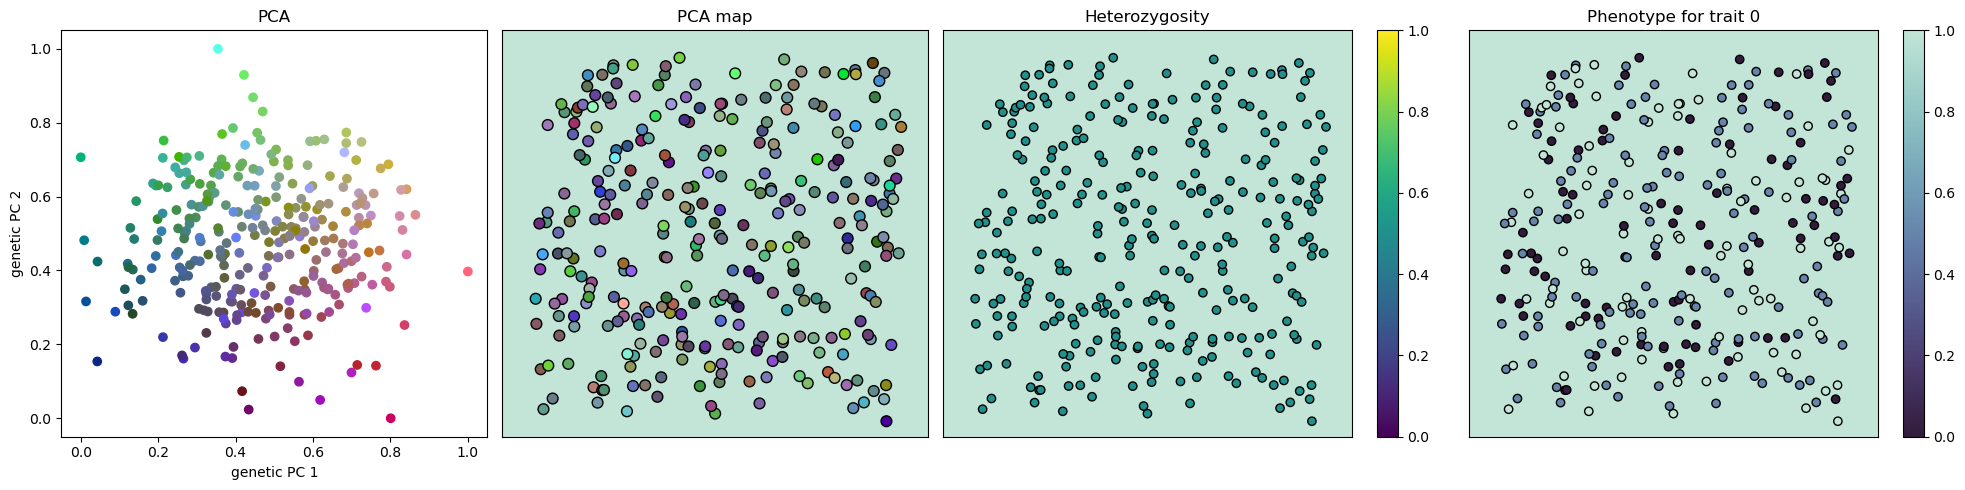

In [23]:
# Plot initial model (no selection has occurred yet)
evo.plot_popgen(mod)

In [24]:
# Run the model for 100 steps
mod.walk(100)



main:	it=-1:	t=0
	species: spp_0                         N=293	(births=61	deaths=67)

	........................................................................
main:	it=-1:	t=1
	species: spp_0                         N=298	(births=58	deaths=53)

	........................................................................
main:	it=-1:	t=2
	species: spp_0                         N=279	(births=70	deaths=89)

	........................................................................
main:	it=-1:	t=3
	species: spp_0                         N=290	(births=59	deaths=48)

	........................................................................
main:	it=-1:	t=4
	species: spp_0                         N=277	(births=56	deaths=69)

	........................................................................
main:	it=-1:	t=5
	species: spp_0                         N=298	(births=55	deaths=34)

	........................................................................
main:	it=-1:	t=6
	species: spp_0      

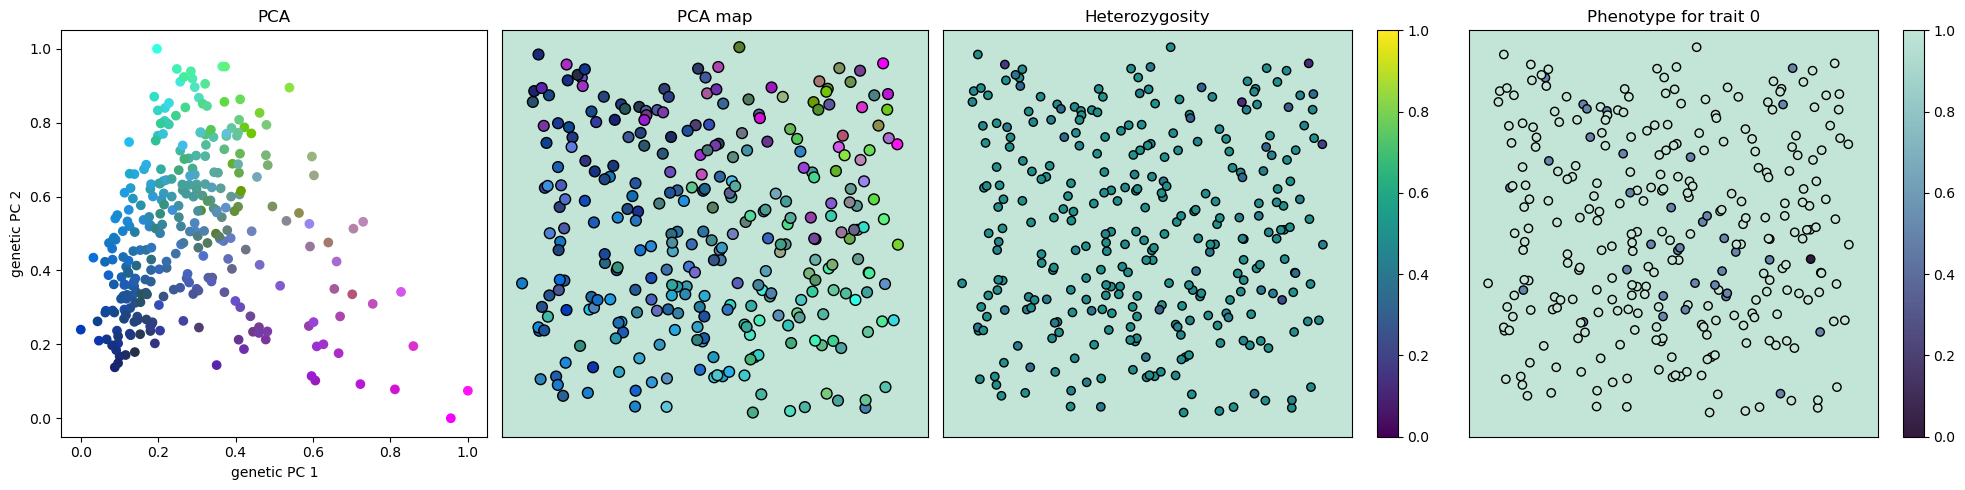

In [25]:

# Plot the results
evo.plot_popgen(mod)

In [26]:

# Run the model for another 100 steps
mod.walk(100)

main:	it=-1:	t=100
	species: spp_0                         N=301	(births=52	deaths=43)

	........................................................................
main:	it=-1:	t=101
	species: spp_0                         N=324	(births=59	deaths=36)

	........................................................................
main:	it=-1:	t=102
	species: spp_0                         N=304	(births=61	deaths=81)

	........................................................................
main:	it=-1:	t=103
	species: spp_0                         N=299	(births=59	deaths=64)

	........................................................................
main:	it=-1:	t=104
	species: spp_0                         N=293	(births=56	deaths=62)

	........................................................................
main:	it=-1:	t=105
	species: spp_0                         N=288	(births=54	deaths=59)

	........................................................................
main:	it=-1:	t=106
	species:

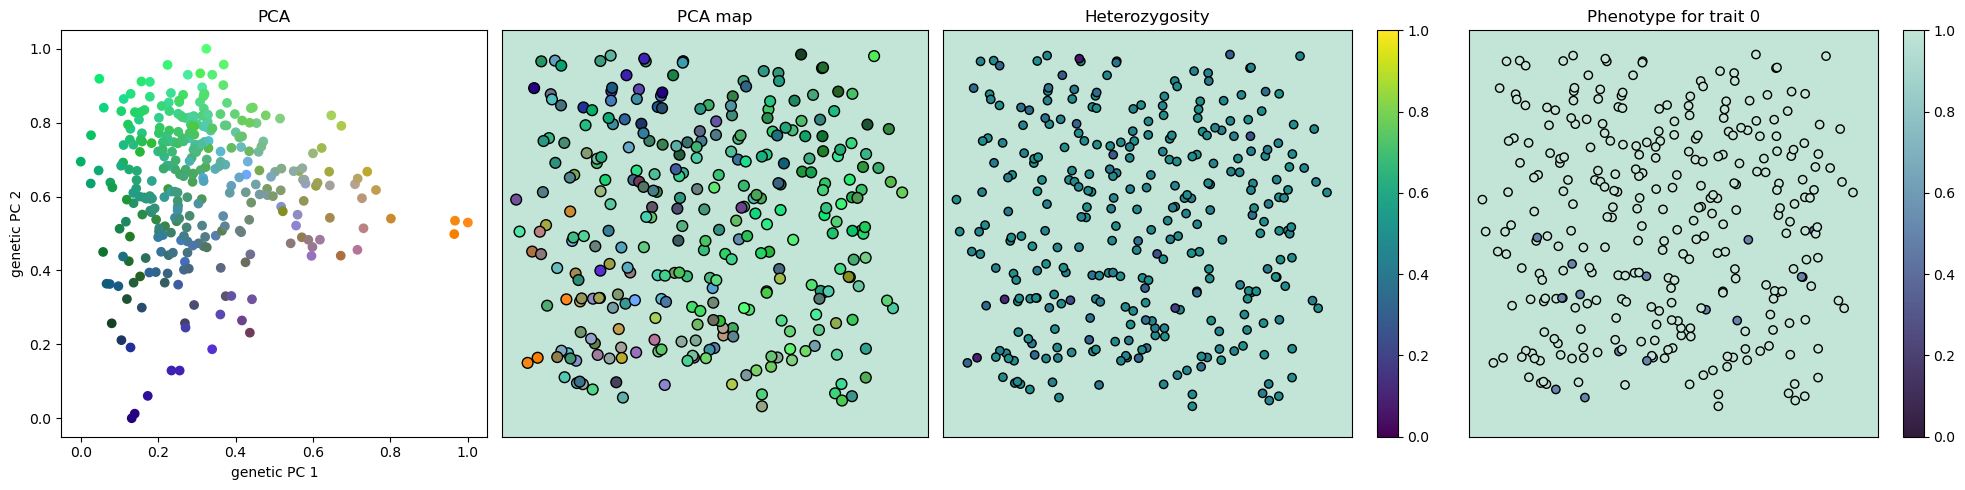

In [27]:

evo.plot_popgen(mod)

# Part 2: Answering real-world questions with Evodoodle

Now that you have played around with Evodoodle, let's apply it to answering some evolutionary and conservation questions. You will have to decide how you want to design your landscapes to answer the question at hand. We will walk through the first example together. Remember our hypothesis testing framework from last time:

If we [**change our landscape**], then [**outcome with evidence**] because [**justification**]

## Exercise 1: Evaluating the effectiveness of a wildlife corridors

Wildlife corridors are a popular method for restoring connectivity between areas fragmented by human development, such as roads. In our previous lab, we used simulations to show how a barrier can result in population divergence. Let's test to see the effect of building a barrier, but including a corridor across it that individuals can pass through.

To test this question we will need to run three simulations: 
1. A simulation with no barrier
2. A simulation with a barrier and no corridor
3. A simulation with a barrier and with a corridor

Before you run these simulations, write down your hypothesis (or hypotheses) about what you think will happen. For these simulations, we will keep our environment uniform (i.e., no selection).

In [29]:
# I am creating a uniform landscape that we will use for our connectivity and environment landscapes
uniform_landscape = np.ones((10,10))
environment = uniform_landscape
connectivity = uniform_landscape
# We will also use a uniform landscape for carrying capacity for our first simulation, but we will change it later
carrying_capacity = uniform_landscape

First, let's run our null simulation with no barrier or corridor:

In [30]:
# Initialize and run our model
mod1 = evo.init_mod(params, carrying_capacity, connectivity, environment)
mod1.walk(200)
evo.plot_popgen(mod1)


MAKING MODEL...

	MAKING LANDSCAPE...

	MAKING COMMUNITY...

		MAKING SPECIES spp_0...

			making genomic architecture...



stty: 'standard input': Inappropriate ioctl for device


			making individuals...

			making movement surface...
				[can take a bit]



No mod.burn_fn_queue was found. Running mod.reset()...


Creating the burn-in function queue...


Creating the main function queue...




: 

Now create your carrying capacity landscape with a barrier by creating a line of 0 value cells dividing the landscape. How you draw this barrier is up to you.

In [ ]:
# Create our carrying capacity barrier landscape
carrying_capacity_barrier = evo.draw_landscape(d = 10)

In [ ]:
# Initialize and run our model
mod2 = evo.init_mod(params, carrying_capacity_barrier, connectivity, environment)
mod2.walk(200)
evo.plot_popgen(mod2)

Now let's edit our barrier landscape to include a corridor. To create a corridor, replace a part of your 0s barrier with 1s. You may want to try multiple corridor widths and see how that affects your results.

In [ ]:
carrying_capacity_corridor = evo.edit_landscape(carrying_capacity_barrier)

In [ ]:
# Initialize and run our model
mod3 = evo.init_mod(params, carrying_capacity_corridor, connectivity, environment)
mod3.walk(200)
evo.plot_popgen(mod3)

Let's recreate our plots below for ease of comparison between our three scenarios:

In [ ]:
# No barrier
evo.plot_popgen(mod1)
# Barrier, no corridor
evo.plot_popgen(mod2)
# Barrier and corridor
evo.plot_popgen(mod3)

**Use your results from above to answer Question 1**

## Exercise 2: Optimizing land management for conservation

You are consulting with a conservation organization that has funds to buy a fixed number of acres of land and is trying to decide whether to build (Option 1) a large, connected, single preserve or (Option 2) several, smaller, disconnected preserves. Design a simulation to help them explore their decision. 

How you design the landscapes for the simulation is up to you, but here are some suggestions:

1. Consider what you are interested in: minimizing drift? conserving phenotypic diversity? maximizing genetic diversity? If you want to keep things simple, you can focus on one of these things for your simulations. Note that if you are interested in genetic diversity, you may need to increase the model walk times to 500 steps.

2. Remember that they have a fixed amount of land they can buy; make sure that the total area preserved when simulating either option is the same (i.e., your small preserves should have the same summed area as your large preserve, otherwise you are just testing the effect of population size rather than preserve configuration). 

3. If you make your preserved areas too small you may end up with extinction; this will appear as an error when running your simulations. You can describe this extinction event as a result.

*Bonus challenge: try and simulate one scenario where option (1) is best and one scenario where (2) is best (Hint: think about different things you might want to conserve such as phenotypic diversity and genetic diversity)*

The code we have provided for you below assumes you are running two simulations; however, you can run as many simulations as you would like by copy and pasting the code chunks below.

**Before you run your simulations write down your hypothesis for Question 3**


In [ ]:
# Doodle your landscapes
carrying_capacity1 = evo.draw_landscape(d = 10)
connectivity1 = evo.draw_landscape(d = 10)
environment1 = evo.draw_landscape(d = 10)

# Run the model with your landscapes
mod1 = evo.init_mod(params, carrying_capacity1, connectivity1, environment1)
# You can run the model for as many steps as you want by changing the argument in walk() from 200 to any other number
mod1.walk(200)
# Plot the results
evo.plot_popgen(mod1)

In [ ]:
# Doodle your landscapes
carrying_capacity2 = evo.draw_landscape(d = 10)
connectivity2 = evo.draw_landscape(d = 10)
environment2 = evo.draw_landscape(d = 10)

# Run the model with your landscapes
mod2 = evo.init_mod(params, carrying_capacity2, connectivity2, environment2)
# You can run the model for as many steps as you want by changing the argument in walk() from 200 to any other number
mod2.walk(200)
# Plot the results
evo.plot_popgen(mod2)

**Use your results to answer Question 2**

# Exercise 3: 

### Challenges

Here are a set of challenges to demonstrate the power and application of simulations to answering real world questions. Some of them will ask you to come up with new simulations of your own. These simulations are stochastic, so make sure to run your simulations multiple times (for the sake of these exercises, 3 times is fine, but if this was a real analysis you would likely want to run at least 10 iterations).

1. You are consulting with a conservation organization that is trying to decide whether to build (Option 1) a large, connected, single preserve or (Option 2) several, smaller, disconnected preserves. Design a simulation (or a set of simulations) to help them make their decision. Bonus challenge: try and simulate one scenario where option (1) is best and one scenario where (2) is best (Hint: think about different things you might want to conserve)

2. Wildlife corridors are a popular method for restoring connectivity between areas fragmented by human development, such as roads. Create a simulation (or a pair of simulations) that shows the effect of a wildlife corridor across a hypothetical road on genetic diversity. What happens if the corridor connects two very different environments?

3. Your friend comes to you super excited because they just analyzed their landscape genetics data on hedgehogs and found a super clear gradient in PC values that aligns with a gradient in temperature. They tell you that they think this is an indication that hedgehogs are locally adapted to temperature. What do you think? Can you come up with a simulation to show your friend what else could be causing this pattern?

4. So far, we have only used the evodoodle default simulation parameters; this means that for all of our simulations, we have used the same underlying species parameters (e.g., number of offspring, longevity, etc.). What are some species parameters that might be important to test? Pick one of the scenarios above and describe two parameters you might want to evaluate in your simulations. 
Some example parameters you might want to consider:
- Movement/dispersal rates
- Longevity (i.e., maximum age)
- Number of offspring per mating event
- Mutation rates
- Selection strength
- Mating radius
- Mutation rates
Explain why you picked these parameters and hypothesize what you might expect to see if you changed them. Your hypothesis does not have to be "correct", it just has to be testable and justified.